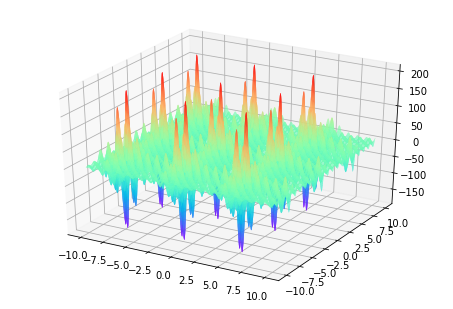

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def q(x):
    s=0
    for k in range(1,6):
        s = s+k*np.cos((k+1)*x+k)
    return s


X=np.linspace(-10,10,500)
Y=np.linspace(-10,10,500)
XX, YY = np.meshgrid(X, Y)
Z=q(XX)*q(YY)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, Z,rstride=1, cstride=1, cmap='rainbow')
plt.show()

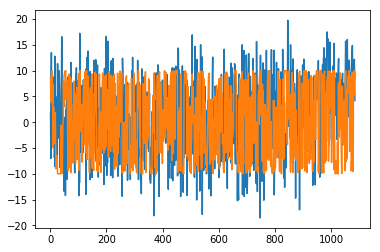

In [10]:
import random
import math

def q(x):
    s=0
    for k in range(1,6):
        s = s+k*np.cos((k+1)*x+k)
    return s

#给旧点以随机扰动
def Disturb(point_old,LB_POINT,RT_POINT):
    if random.random()<0.5:
        point_old[0]=LB_POINT[0]+random.random()*(point_old[0]-LB_POINT[0])
    else:
        point_old[0]=point_old[0]+random.random()*(RT_POINT[0]-point_old[0])
    if random.random()<0.5:
        point_old[1]=LB_POINT[1]+random.random()*(point_old[1]-LB_POINT[1])
    else:
        point_old[1]=point_old[1]+random.random()*(RT_POINT[1]-point_old[1])
    return point_old[0],point_old[1]
 
def Judge2Max(deltaE,T):
    if deltaE>0:
        return 1
    else:
        probability=math.exp(deltaE/T)
        if probability>random.random():
            return 1
        else:
            return 0

LB_POINT = np.array([-10,-10])
RT_POINT=np.array([10,10])
x_old = 20*random.random()-10
y_old = 20*random.random()-10
x_new = x_old
y_new = y_old
 
point_old = np.array([x_old,y_old])
value_old = q(x_old)*q(x_old)
point_new = np.array([x_new,y_new])
value_new = value_old
 
tmp = 1e5
tmp_min = 1e-3
alpha = 0.98
counter = 0
 
record_coord = []
record_value = []
while(tmp >= tmp_min and counter <= 1000):
    point_new[0],point_new[1] = Disturb(point_old,LB_POINT,RT_POINT)
    value_new = ObjFunc(point_new[0],point_new[1])
    deltaE = value_new - value_old
    if Judge2Max(deltaE,tmp) == 1:
        record_coord.append(point_new.copy())
        record_value.append(value_new)
        point_old = point_new
        value_old = value_new
    if deltaE > 0:
        tmp = tmp * alpha
    else:
        counter += 1
        #print(counter)

length=len(record_value)
x=[i+1 for i in range(length)]
plt.plot(x,record_value)
coor_x=[record_coord[i][0] for i in range(length)]
coor_y=[record_coord[i][1] for i in range(length)]
coordinates=[]
for i in range(length):
    coordinates.append([coor_x[0],coor_y[1]])
plt.plot(x,coor_x)


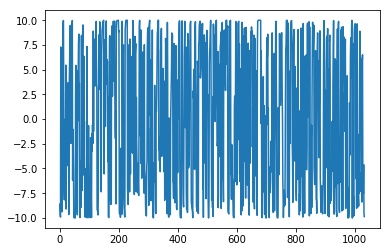

In [9]:
plt.plot(x,coor_y)